# female population and hk recycling volume per day

Model Summary:
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         3.193e+04   5287.571      6.039      0.000    2.08e+04     4.3e+04
Female population (mid-year)    -0.0066      0.001     -4.849      0.000      -0.010      -0.004

R-squared: 0.5664


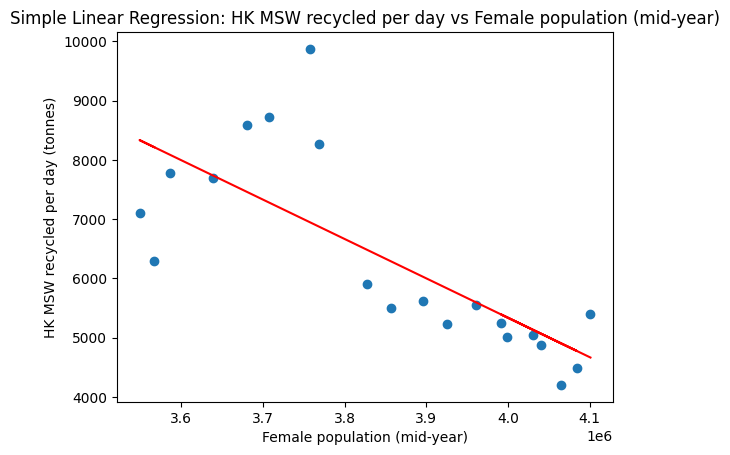

In [2]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK MSW recycled per day vs Female population (mid-year)

# Prepare data
df["Female population (mid-year)"] = pd.to_numeric(
    df["Female population (mid-year)"], errors="coerce"
)
df["HK total MSW recycled (tonnes)"] = pd.to_numeric(
    df["HK total MSW recycled (tonnes)"], errors="coerce"
)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Add number of days in each year (leap years: 2004, 2008, 2012, 2016, 2020, 2024)
leap_years = [2004, 2008, 2012, 2016, 2020, 2024]
df["days_in_year"] = df["Year"].apply(
    lambda y: 366 if pd.notna(y) and int(y) in leap_years else (365 if pd.notna(y) else np.nan)
)

# Compute HK MSW recycled per day (tonnes/day)
df["HK MSW recycled per day (tonnes)"] = (
    df["HK total MSW recycled (tonnes)"] / df["days_in_year"]
)

# Keep only rows where both variables are available
mask = (
    df["Female population (mid-year)"].notna()
    & df["HK MSW recycled per day (tonnes)"].notna()
)
X_female = df.loc[mask, ["Female population (mid-year)"]]
y_female = df.loc[mask, "HK MSW recycled per day (tonnes)"]

# Fit model using sklearn for predictions
lin_reg_female = LinearRegression()
lin_reg_female.fit(X_female, y_female)

# Fit model using statsmodels for statistical tests
X_female_sm = sm.add_constant(X_female)  # Add constant term for intercept
model_female = sm.OLS(y_female, X_female_sm)
results_female = model_female.fit()

# Predictions for plotting
y_pred_female = lin_reg_female.predict(X_female)

print("Model Summary:")
print(results_female.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_female.rsquared:.4f}")

# Plot
plt.scatter(X_female, y_female)
plt.plot(X_female, y_pred_female, color='red')
plt.xlabel('Female population (mid-year)')
plt.ylabel('HK MSW recycled per day (tonnes)')
plt.title('Simple Linear Regression: HK MSW recycled per day vs Female population (mid-year)')
plt.show()


**Female population coefficient ($\hat \beta_1$) ≈ -0.0067 (p ≈ 0.0007 < 0.05)**  

- There is a **statistically significant negative association** between Hong Kong’s female mid-year population and the daily MSW recycling volume. As the female population increases, the amount of MSW recycled per day tends to **decrease slightly**, suggesting that population growth has not been matched by proportional increases in total recycling.  

- The **R-squared is moderate (~0.48)**, meaning female population size explains **around 48% of the variation** in daily recycling volume; the remaining variation is likely driven by other factors such as recycling policies, economic conditions, waste-reduction measures, and residents’ recycling behaviour.
